In [ ]:
from __future__ import absolute_import, division, print_function

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [13]:
#Uploading my file
data1 = pd.read_csv("Churn_Modelling.csv", skiprows = 0)

In [14]:
for c in data1.columns:
    print(c)

RowNumber
CustomerId
Surname
CreditScore
Geography
Gender
Age
Tenure
Balance
NumOfProducts
HasCrCard
IsActiveMember
EstimatedSalary
Exited
Label


In [15]:
data2 = data1.drop(["RowNumber","Surname"],axis=1)

In [16]:
data2.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Label
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Churned
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,NotChurned
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Churned
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,NotChurned
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,NotChurned


In [ ]:
#Dependent variable : "Exited" : { 1 means "Churned" while 0 means "NotChurned" }

In [17]:
data2.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [18]:
#No missing values
data2.count()

CustomerId         10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
Label              10000
dtype: int64

In [19]:
data2.tail()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Label
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,NotChurned
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,NotChurned
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Churned
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Churned
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,NotChurned


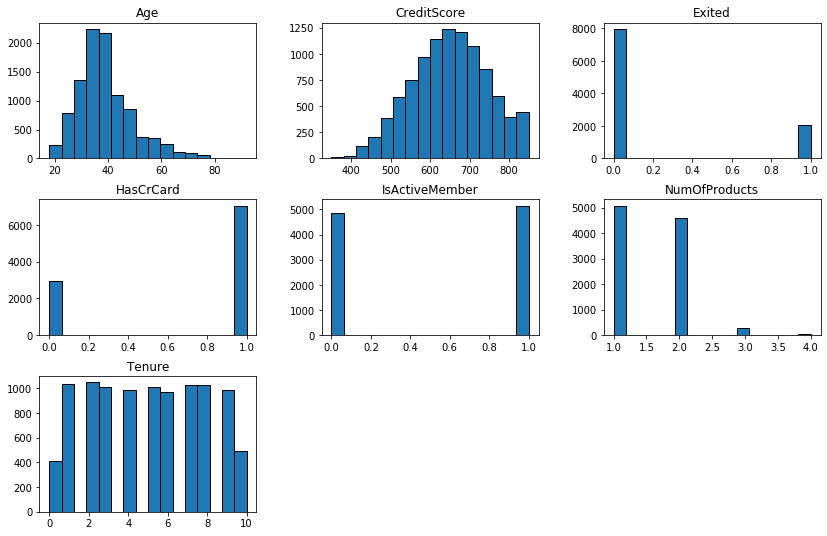

In [20]:
#Plotting the data to get a sense of the distribution
data2[['CreditScore','Age','Tenure','NumOfProducts','HasCrCard','IsActiveMember','Exited']].hist(figsize=(14, 9),bins=16,linewidth='1',edgecolor='k',grid=False)
plt.show()

In [22]:
data1nparray = data2.values

In [23]:
data2.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Label
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Churned
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,NotChurned
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Churned
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,NotChurned
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,NotChurned


In [39]:
TrainData   = data1nparray[:, [1,4,5,6,7,8,9,10]]
TrainLabels = data1nparray[:, [-2]]    

In [40]:
TrainData

array([[619, 42, 2, ..., 1, 1, 101348.88],
       [608, 41, 1, ..., 0, 1, 112542.58],
       [502, 42, 8, ..., 1, 0, 113931.57],
       ...,
       [709, 36, 7, ..., 0, 1, 42085.58],
       [772, 42, 3, ..., 1, 0, 92888.52],
       [792, 28, 4, ..., 1, 0, 38190.78]], dtype=object)

In [41]:
TrainLabels

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=object)

In [44]:
import sklearn

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(TrainData)

In [47]:
model = keras.Sequential([
#    keras.layers.Flatten(input_shape=(1, 6)),
#    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(9, activation=tf.nn.relu), #8=independent variables
    keras.layers.Dense(2, activation=tf.nn.softmax) #2=number of categorical values in categorical dependent variable
])


In [48]:
model.compile(
              optimizer='adam',
#             optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
model.fit(rescaledX, TrainLabels, epochs=20) 

Epoch 1/20
10000/10000 [==============================] - 1s 121us/sample - loss: 0.4916 - acc: 0.7963
Epoch 2/20
10000/10000 [==============================] - 0s 37us/sample - loss: 0.4748 - acc: 0.7968
Epoch 3/20
10000/10000 [==============================] - 0s 35us/sample - loss: 0.4654 - acc: 0.8007
Epoch 4/20
10000/10000 [==============================] - 0s 34us/sample - loss: 0.4588 - acc: 0.8049
Epoch 5/20
10000/10000 [==============================] - 0s 34us/sample - loss: 0.4538 - acc: 0.8074
Epoch 6/20
10000/10000 [==============================] - 0s 34us/sample - loss: 0.4494 - acc: 0.8105
Epoch 7/20
10000/10000 [==============================] - 0s 34us/sample - loss: 0.4459 - acc: 0.8114
Epoch 8/20
10000/10000 [==============================] - 0s 34us/sample - loss: 0.4394 - acc: 0.8133
Epoch 9/20
10000/10000 [==============================] - 0s 33us/sample - loss: 0.4333 - acc: 0.8147
Epoch 10/20
10000/10000 [==============================] - 0s 34us/sample - loss:

In [50]:
train_loss, train_acc = model.evaluate(rescaledX, TrainLabels)

print('Train accuracy:', train_acc)


10000/10000 [==============================] - 0s 19us/sample - loss: 0.3763 - acc: 0.8435
Train accuracy: 0.8435


In [51]:
predictions = model.predict(rescaledX)


In [52]:
predictions

array([[0.83604556, 0.16395442],
       [0.8303318 , 0.1696682 ],
       [0.16391967, 0.8360803 ],
       ...,
       [0.89553344, 0.10446653],
       [0.78726465, 0.21273534],
       [0.8792397 , 0.12076026]], dtype=float32)

In [53]:
class_names = ['NotChurned', 'Churned']


In [54]:
def plot_image(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i][0]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  


  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i][0]
  plt.grid(True)
  plt.xticks([])
  #plt.yticks([])
  thisplot = plt.bar(range(2), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


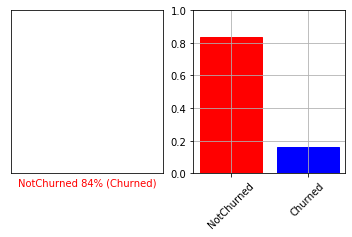

In [55]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, TrainLabels)
plt.subplot(1,2,2)
plot_value_array(i, predictions, TrainLabels)
plt.xticks(range(2), class_names, rotation=45)
plt.show()
